# 데이터 로딩

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [4]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

2021-09-28 22:53:50.241434: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 242480352876341558,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 22986817536
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 5391799815259184874
 physical_device_desc: "device: 0, name: GeForce RTX 3090, pci bus id: 0000:68:00.0, compute capability: 8.6"]

2021-09-28 22:53:50.681782: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /device:GPU:0 with 21921 MB memory:  -> device: 0, name: GeForce RTX 3090, pci bus id: 0000:68:00.0, compute capability: 8.6


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('210923_total_freq_with_noise_2000point_1092kDa.csv')
df1 = data.values[:] # 문자열을 부동소수점형으로 변환한다
print(df1)

[[26575154.39 26559429.85 26577232.39 ... 26563264.35 26578401.78
         0.  ]
 [26582963.93 26557058.42 26559785.6  ... 26572279.   26548192.13
         0.  ]
 [26553861.15 26569689.24 26569843.09 ... 26568090.14 26556285.29
         0.  ]
 ...
 [26551749.62 26559928.27 26577873.1  ... 26558360.55 26571760.59
     50000.  ]
 [26571114.14 26585314.96 26546662.98 ... 26550233.03 26543977.89
     50000.  ]
 [26577773.84 26581361.52 26550459.41 ... 26561488.89 26544390.67
     50000.  ]]


# 데이터 살펴보기

152개의 속성 값이 있고, -1 또는 1로 레이블링 되어 있다.

152개 속성 값은 어떤 센서의 값을 시간을 두고 측정한 것이다.

In [7]:
df2_1 = data["target"]
df2 = df2_1[:]
print(df2)

0           0
1           0
2           0
3           0
4           0
        ...  
5495    50000
5496    50000
5497    50000
5498    50000
5499    50000
Name: target, Length: 5500, dtype: int64


In [8]:
target_count = np.unique(df2, return_counts=True)
print(target_count)

(array([    0,  5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000,
       45000, 50000]), array([500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500]))


In [9]:
target_count = np.unique(df2, return_counts=True)
print(target_count)

(array([    0,  5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000,
       45000, 50000]), array([500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500]))


target값 -1, 1을 category 인덱스 0, 1로 변경

In [10]:
df2 = df2.copy()
df2[df2 < 5000] = 0
df2[df2 == 5000] = 1
df2[df2 == 10000] = 2
df2[df2 == 15000] = 3
df2[df2 == 20000] = 4
df2[df2 == 25000] = 5
df2[df2 == 30000] = 6
df2[df2 == 35000] = 7
df2[df2 == 40000] = 8
df2[df2 == 45000] = 9
df2[df2 == 50000] = 10

target_count = np.unique(df2, return_counts=True)
print(target_count)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500]))


# 문제 정의

152개의 순차적인 센서 값을 가지고 분류한다.


# 데이터 준비


## x, y 쪼개기

In [11]:
x, y = df1[:,:-1], df2[:]

In [12]:
print(x.shape)
print(y.shape)

(5500, 4000)
(5500,)


In [13]:
y

0        0
1        0
2        0
3        0
4        0
        ..
5495    10
5496    10
5497    10
5498    10
5499    10
Name: target, Length: 5500, dtype: int64

## normalization

In [14]:
min = np.min(x)
max = np.max(x)
print(min, max)

x = (x-min) / (max-min)

min = np.min(x)
max = np.max(x)
print(min, max)


26469655.36 26647767.36
0.0 1.0


In [15]:
x = np.expand_dims(x, -1)

## 섞고

In [16]:
shuffled_index = np.random.permutation(len(x))
x = x[shuffled_index]
y = y.iloc[shuffled_index]
x, y = np.array(x), np.array(y)

## train, test 쪼개기

In [17]:
#split_index = int( len(x) * 0.8 )
#train_x, test_x = np.array(x[:split_index]), np.array(x[split_index:])
#train_y, test_y = np.array(y[:split_index]), np.array(y[split_index:])

In [18]:
#train_x[1].shape

In [19]:
#train_x[1]

# 모델 정의

In [20]:
import tensorflow as tf
from sklearn.model_selection import KFold 
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Conv1D, Flatten
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import StratifiedKFold

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#from tensorflow.keras.utils import np_utils
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold

2021-09-28 22:53:54.827614: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 21921 MB memory:  -> device: 0, name: GeForce RTX 3090, pci bus id: 0000:68:00.0, compute capability: 8.6
2021-09-28 22:53:55.373362: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2021-09-28 22:53:56.369107: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8100
2021-09-28 22:53:57.719368: I tensorflow/stream_executor/cuda/cuda_blas.cc:1760] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


8/8 [==============================] - 4s 196ms/step - loss: 2.4062 - accuracy: 0.0879 - val_loss: 2.3987 - val_accuracy: 0.0795
Epoch 2/100
8/8 [==============================] - 1s 84ms/step - loss: 2.3980 - accuracy: 0.0859 - val_loss: 2.3978 - val_accuracy: 0.0864
Epoch 3/100
8/8 [==============================] - 1s 84ms/step - loss: 2.3979 - accuracy: 0.0927 - val_loss: 2.3979 - val_accuracy: 0.0864
Epoch 4/100
8/8 [==============================] - 1s 83ms/step - loss: 2.3978 - accuracy: 0.0927 - val_loss: 2.3979 - val_accuracy: 0.0864
Epoch 5/100
8/8 [==============================] - 1s 83ms/step - loss: 2.3978 - accuracy: 0.0927 - val_loss: 2.3980 - val_accuracy: 0.0864
Epoch 6/100
8/8 [==============================] - 1s 83ms/step - loss: 2.3978 - accuracy: 0.0927 - val_loss: 2.3980 - val_accuracy: 0.0864
Epoch 7/100
8/8 [==============================] - 1s 83ms/step - loss: 2.3978 - accuracy: 0.0927 - val_loss: 2.3980 - val_accuracy: 0.0864
Epoch 8/100
8/8 [==============

8/8 [==============================] - 1s 83ms/step - loss: 2.3977 - accuracy: 0.0932 - val_loss: 2.3992 - val_accuracy: 0.0864
Epoch 60/100
8/8 [==============================] - 1s 83ms/step - loss: 2.3977 - accuracy: 0.0894 - val_loss: 2.3992 - val_accuracy: 0.0682
Epoch 61/100
8/8 [==============================] - 1s 83ms/step - loss: 2.3977 - accuracy: 0.0881 - val_loss: 2.3993 - val_accuracy: 0.0864
Epoch 62/100
8/8 [==============================] - 1s 87ms/step - loss: 2.3977 - accuracy: 0.0899 - val_loss: 2.3992 - val_accuracy: 0.0682
Epoch 63/100
8/8 [==============================] - 1s 84ms/step - loss: 2.3977 - accuracy: 0.0934 - val_loss: 2.3992 - val_accuracy: 0.0682
Epoch 64/100
8/8 [==============================] - 1s 83ms/step - loss: 2.3977 - accuracy: 0.0934 - val_loss: 2.3993 - val_accuracy: 0.0682
Epoch 65/100
8/8 [==============================] - 1s 82ms/step - loss: 2.3977 - accuracy: 0.0894 - val_loss: 2.3993 - val_accuracy: 0.0682
Epoch 66/100
8/8 [========

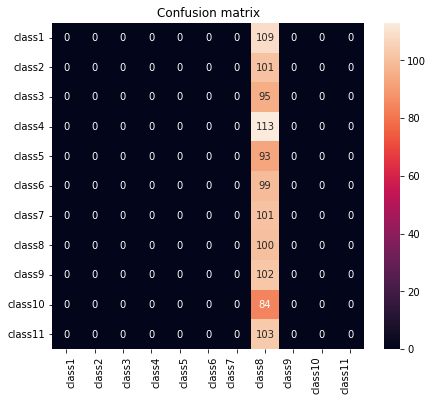

Precision:0.00826
Recall:0.0909
F1_score:0.0152
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       109
           1       0.00      0.00      0.00       101
           2       0.00      0.00      0.00        95
           3       0.00      0.00      0.00       113
           4       0.00      0.00      0.00        93
           5       0.00      0.00      0.00        99
           6       0.00      0.00      0.00       101
           7       0.09      1.00      0.17       100
           8       0.00      0.00      0.00       102
           9       0.00      0.00      0.00        84
          10       0.00      0.00      0.00       103

    accuracy                           0.09      1100
   macro avg       0.01      0.09      0.02      1100
weighted avg       0.01      0.09      0.02      1100

Epoch 1/100
8/8 [==============================] - 1s 104ms/step - loss: 2.3982 - accuracy: 0.0874 - val_loss: 2.3982 - val_accuracy: 0.086

8/8 [==============================] - 1s 83ms/step - loss: 1.8209 - accuracy: 0.2674 - val_loss: 1.7794 - val_accuracy: 0.2659
Epoch 54/100
8/8 [==============================] - 1s 82ms/step - loss: 1.7778 - accuracy: 0.2386 - val_loss: 1.7785 - val_accuracy: 0.2318
Epoch 55/100
8/8 [==============================] - 1s 82ms/step - loss: 1.7534 - accuracy: 0.2311 - val_loss: 1.7584 - val_accuracy: 0.2091
Epoch 56/100
8/8 [==============================] - 1s 83ms/step - loss: 1.7555 - accuracy: 0.2384 - val_loss: 1.7504 - val_accuracy: 0.2386
Epoch 57/100
8/8 [==============================] - 1s 84ms/step - loss: 1.7340 - accuracy: 0.2348 - val_loss: 1.7412 - val_accuracy: 0.2364
Epoch 58/100
8/8 [==============================] - 1s 81ms/step - loss: 1.7197 - accuracy: 0.2417 - val_loss: 1.7400 - val_accuracy: 0.2136
Epoch 59/100
8/8 [==============================] - 1s 83ms/step - loss: 1.7121 - accuracy: 0.2543 - val_loss: 1.7213 - val_accuracy: 0.2114
Epoch 60/100
8/8 [========

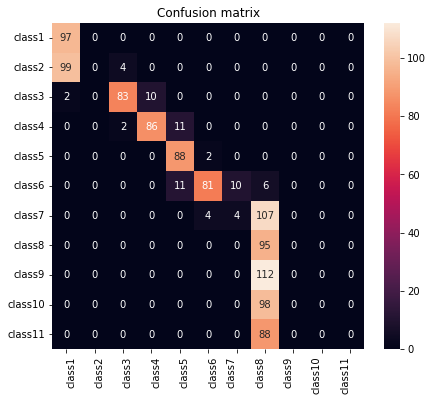

Precision:0.407
Recall:0.485
F1_score:0.403
              precision    recall  f1-score   support

           0       0.49      1.00      0.66        97
           1       0.00      0.00      0.00       103
           2       0.93      0.87      0.90        95
           3       0.90      0.87      0.88        99
           4       0.80      0.98      0.88        90
           5       0.93      0.75      0.83       108
           6       0.29      0.03      0.06       115
           7       0.19      1.00      0.32        95
           8       0.00      0.00      0.00       112
           9       0.00      0.00      0.00        98
          10       0.00      0.00      0.00        88

    accuracy                           0.49      1100
   macro avg       0.41      0.50      0.41      1100
weighted avg       0.41      0.49      0.40      1100

Epoch 1/100
8/8 [==============================] - 1s 125ms/step - loss: 2.3993 - accuracy: 0.0861 - val_loss: 2.3982 - val_accuracy: 0.0727
Ep

8/8 [==============================] - 1s 83ms/step - loss: 2.3975 - accuracy: 0.0939 - val_loss: 2.4013 - val_accuracy: 0.0614
Epoch 54/100
8/8 [==============================] - 1s 81ms/step - loss: 2.3975 - accuracy: 0.0939 - val_loss: 2.4013 - val_accuracy: 0.0614
Epoch 55/100
8/8 [==============================] - 1s 83ms/step - loss: 2.3975 - accuracy: 0.0939 - val_loss: 2.4013 - val_accuracy: 0.0614
Epoch 56/100
8/8 [==============================] - 1s 81ms/step - loss: 2.3975 - accuracy: 0.0939 - val_loss: 2.4013 - val_accuracy: 0.0614
Epoch 57/100
8/8 [==============================] - 1s 82ms/step - loss: 2.3975 - accuracy: 0.0939 - val_loss: 2.4013 - val_accuracy: 0.0614
Epoch 58/100
8/8 [==============================] - 1s 81ms/step - loss: 2.3975 - accuracy: 0.0939 - val_loss: 2.4014 - val_accuracy: 0.0614
Epoch 59/100
8/8 [==============================] - 1s 82ms/step - loss: 2.3975 - accuracy: 0.0939 - val_loss: 2.4014 - val_accuracy: 0.0614
Epoch 60/100
8/8 [========

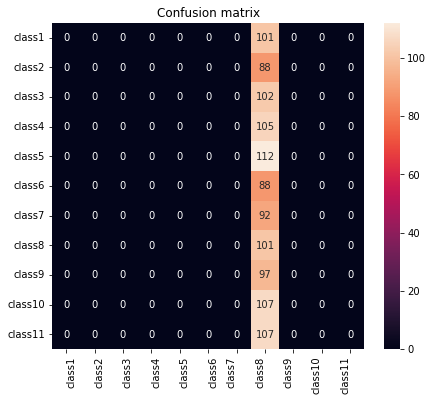

Precision:0.00843
Recall:0.0918
F1_score:0.0154
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       101
           1       0.00      0.00      0.00        88
           2       0.00      0.00      0.00       102
           3       0.00      0.00      0.00       105
           4       0.00      0.00      0.00       112
           5       0.00      0.00      0.00        88
           6       0.00      0.00      0.00        92
           7       0.09      1.00      0.17       101
           8       0.00      0.00      0.00        97
           9       0.00      0.00      0.00       107
          10       0.00      0.00      0.00       107

    accuracy                           0.09      1100
   macro avg       0.01      0.09      0.02      1100
weighted avg       0.01      0.09      0.02      1100

Epoch 1/100
8/8 [==============================] - 1s 101ms/step - loss: 2.3983 - accuracy: 0.0927 - val_loss: 2.3981 - val_accuracy: 0.070

8/8 [==============================] - 1s 82ms/step - loss: 2.3972 - accuracy: 0.0955 - val_loss: 2.4043 - val_accuracy: 0.0795
Epoch 54/100
8/8 [==============================] - 1s 81ms/step - loss: 2.3972 - accuracy: 0.0955 - val_loss: 2.4043 - val_accuracy: 0.0795
Epoch 55/100
8/8 [==============================] - 1s 82ms/step - loss: 2.3972 - accuracy: 0.0955 - val_loss: 2.4043 - val_accuracy: 0.0795
Epoch 56/100
8/8 [==============================] - 1s 81ms/step - loss: 2.3972 - accuracy: 0.0955 - val_loss: 2.4044 - val_accuracy: 0.0795
Epoch 57/100
8/8 [==============================] - 1s 83ms/step - loss: 2.3972 - accuracy: 0.0955 - val_loss: 2.4044 - val_accuracy: 0.0795
Epoch 58/100
8/8 [==============================] - 1s 83ms/step - loss: 2.3972 - accuracy: 0.0955 - val_loss: 2.4044 - val_accuracy: 0.0795
Epoch 59/100
8/8 [==============================] - 1s 81ms/step - loss: 2.3972 - accuracy: 0.0955 - val_loss: 2.4044 - val_accuracy: 0.0795
Epoch 60/100
8/8 [========

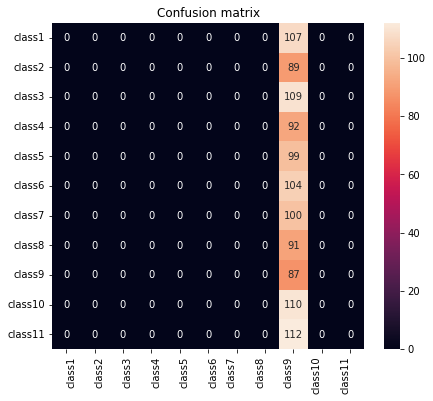

Precision:0.00626
Recall:0.0791
F1_score:0.0116
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       107
           1       0.00      0.00      0.00        89
           2       0.00      0.00      0.00       109
           3       0.00      0.00      0.00        92
           4       0.00      0.00      0.00        99
           5       0.00      0.00      0.00       104
           6       0.00      0.00      0.00       100
           7       0.00      0.00      0.00        91
           8       0.08      1.00      0.15        87
           9       0.00      0.00      0.00       110
          10       0.00      0.00      0.00       112

    accuracy                           0.08      1100
   macro avg       0.01      0.09      0.01      1100
weighted avg       0.01      0.08      0.01      1100

Epoch 1/100
8/8 [==============================] - 1s 101ms/step - loss: 2.3985 - accuracy: 0.0914 - val_loss: 2.3967 - val_accuracy: 0.090

8/8 [==============================] - 1s 83ms/step - loss: 1.1602 - accuracy: 0.5424 - val_loss: 1.1793 - val_accuracy: 0.4932
Epoch 54/100
8/8 [==============================] - 1s 82ms/step - loss: 1.3000 - accuracy: 0.4770 - val_loss: 1.4956 - val_accuracy: 0.4068
Epoch 55/100
8/8 [==============================] - 1s 81ms/step - loss: 1.2821 - accuracy: 0.4896 - val_loss: 1.2848 - val_accuracy: 0.4909
Epoch 56/100
8/8 [==============================] - 1s 82ms/step - loss: 1.2076 - accuracy: 0.5354 - val_loss: 1.2357 - val_accuracy: 0.4636
Epoch 57/100
8/8 [==============================] - 1s 81ms/step - loss: 1.1567 - accuracy: 0.5409 - val_loss: 1.1933 - val_accuracy: 0.5227
Epoch 58/100
8/8 [==============================] - 1s 81ms/step - loss: 1.1213 - accuracy: 0.5432 - val_loss: 1.1559 - val_accuracy: 0.5182
Epoch 59/100
8/8 [==============================] - 1s 83ms/step - loss: 1.1161 - accuracy: 0.5480 - val_loss: 1.1851 - val_accuracy: 0.5364
Epoch 60/100
8/8 [========

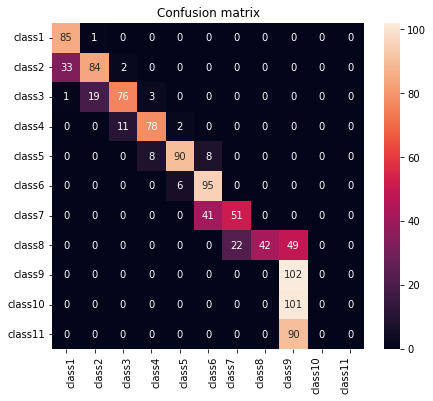

Precision:0.63
Recall:0.639
F1_score:0.597
              precision    recall  f1-score   support

           0       0.71      0.99      0.83        86
           1       0.81      0.71      0.75       119
           2       0.85      0.77      0.81        99
           3       0.88      0.86      0.87        91
           4       0.92      0.85      0.88       106
           5       0.66      0.94      0.78       101
           6       0.70      0.55      0.62        92
           7       1.00      0.37      0.54       113
           8       0.30      1.00      0.46       102
           9       0.00      0.00      0.00       101
          10       0.00      0.00      0.00        90

    accuracy                           0.64      1100
   macro avg       0.62      0.64      0.59      1100
weighted avg       0.63      0.64      0.60      1100


K-fold cross validation Accuracy: ['0.0909', '0.4855', '0.0918', '0.0791', '0.6391']


In [22]:
# 주어진 데이터를 학습 데이터와 테스트 데이터로 분리
skf = KFold(n_splits=5, random_state=42, shuffle=True)

accuracy = []

for train, validation in skf.split(x,y):
    model = keras.Sequential()
    model.add(Conv1D(16, 9, activation='relu', input_shape=(len(x[0]),1)))
    model.add(Conv1D(16, 9, activation='relu'))
    model.add(Conv1D(32, 9, activation='relu'))
    model.add(Conv1D(32, 9, activation='relu'))
    model.add(Conv1D(32, 9, activation='relu'))
    model.add(Conv1D(32, 9, activation='relu'))
    model.add(Conv1D(32, 9, activation='relu'))
    model.add(Flatten())
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(11, activation="softmax"))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  #model.summary()

  # 학습 데이터를 이용해서 학습
    hist = model.fit(x[train], y[train], epochs=100, batch_size=512, verbose=1, validation_split=0.1)  

  # 테스트 데이터를 이용해서 검증
    k_accuracy = '%.4f' % (model.evaluate(x[validation], y[validation])[1])
    accuracy.append(k_accuracy)
  
  #confusion matrix
    y_ = model.predict(x[validation])
    predicted = np.argmax(y_, axis = -1)

    classes = ['class1', 'class2', 'class3', 'class4', 'class5', 'class6', 'class7','class8', 'class9', 'class10','class11' ]
    conf_mat = confusion_matrix(y[validation], predicted)
    fig, ax = plt.subplots(figsize=(7,6))
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    plt.title('Confusion matrix')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
    plt.show()

  #정밀도, 재현도, f1-score
    precision = precision_score(y[validation], predicted, average='weighted')
    recall = recall_score(y[validation], predicted, average='weighted')
    f1 = f1_score(y[validation], predicted, average='weighted')

    print('Precision:{:.3}'.format(precision))
    print('Recall:{:.3}'.format(recall))
    print('F1_score:{:.3}'.format(f1))

  #분류 보고서
    print(classification_report(y[validation], predicted))

# 전체 검증 결과 출력
print('\nK-fold cross validation Accuracy: {}'.format(accuracy))

In [23]:
accuracy

['0.0909', '0.4855', '0.0918', '0.0791', '0.6391']

In [24]:
acc = list(map(float, accuracy))
acc

[0.0909, 0.4855, 0.0918, 0.0791, 0.6391]

In [25]:
np.mean(acc)

0.27728